In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

In [2]:
class MNISTDataset(Dataset):
    def __init__(self, root, transform=None):
        self.dataset = datasets.MNIST(root=root, train=True, download=True, transform=transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[idx]

In [3]:
import time

def loading_time_calculator(dataloader):
    t1 = time.time()
    for data in dataloader:
        pass
    t2 = time.time()

    return t2 - t1

In [4]:
# Set up transforms and custom dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [5]:
# Batch sizes to compare
batch_sizes = [128, 256, 512, 1024]

In [6]:
custom_dataset = MNISTDataset(root='./dataset', transform=transform)

In [7]:
custom_time = []
for i in batch_sizes:
    custom_dataloader = DataLoader(custom_dataset, batch_size=i, shuffle=True)
    duration = loading_time_calculator(custom_dataloader)
    custom_time.append(duration)

In [8]:
torch_time = []
for i in batch_sizes:
    torch_dataloader = DataLoader(datasets.MNIST(root='./dataset', train=True, download=True, transform=transform), batch_size=i, shuffle=True)
    duration = loading_time_calculator(torch_dataloader)
    torch_time.append(duration)

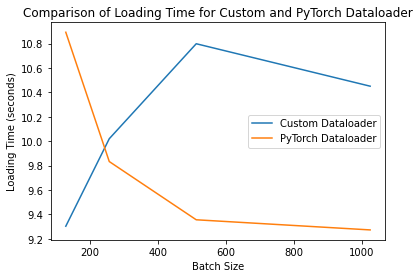

In [9]:
import matplotlib.pyplot as plt

plt.plot(batch_sizes, custom_time, label='Custom Dataloader')
plt.plot(batch_sizes, torch_time, label='PyTorch Dataloader')
plt.xlabel('Batch Size')
plt.ylabel('Loading Time (seconds)')
plt.title('Comparison of Loading Time for Custom and PyTorch Dataloader')
plt.legend()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [ ]:

# Define the Feed-Forward Neural Network
class Linear(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Linear, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.relu4 = nn.ReLU()
        self.fc5  = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.fc5(x)
        return x

In [ ]:
def train(model, train_loader, criterion, optimizer, epochs=60):
    train_losses = []
    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            inputs = inputs.view(inputs.size(0), -1)  # Flatten the input images
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        average_loss = total_loss / len(train_loader)
        train_losses.append(average_loss)
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {average_loss:.4f}')

    return train_losses

In [ ]:

def test_loss(model, train_loader, criterion, optimizer):
    test_losses = []
    total_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the input images
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    train_losses.append(average_loss)

    return train_losses

In [ ]:

# Define a function for evaluating the model
def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

In [ ]:
# Set up the model, loss function, and optimizer
input_size = 28 * 28  # MNIST image size
hidden_size = 32
output_size = 10  # Number of classes in MNIST
learning_rate = 0.0003

In [ ]:
model = Linear(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

Epoch [1/60], Loss: 2.3052
Epoch [2/60], Loss: 2.3042
Epoch [3/60], Loss: 2.3032
Epoch [4/60], Loss: 2.3021
Epoch [5/60], Loss: 2.3011
Epoch [6/60], Loss: 2.3002
Epoch [7/60], Loss: 2.2992
Epoch [8/60], Loss: 2.2983
Epoch [9/60], Loss: 2.2973
Epoch [10/60], Loss: 2.2963
Epoch [11/60], Loss: 2.2951
Epoch [12/60], Loss: 2.2939
Epoch [13/60], Loss: 2.2925
Epoch [14/60], Loss: 2.2910
Epoch [15/60], Loss: 2.2894
Epoch [16/60], Loss: 2.2877
Epoch [17/60], Loss: 2.2857
Epoch [18/60], Loss: 2.2834
Epoch [19/60], Loss: 2.2810
Epoch [20/60], Loss: 2.2784
Epoch [21/60], Loss: 2.2757
Epoch [22/60], Loss: 2.2729
Epoch [23/60], Loss: 2.2699
Epoch [24/60], Loss: 2.2667
Epoch [25/60], Loss: 2.2634
Epoch [26/60], Loss: 2.2597
Epoch [27/60], Loss: 2.2557
Epoch [28/60], Loss: 2.2514
Epoch [29/60], Loss: 2.2467
Epoch [30/60], Loss: 2.2415
Epoch [31/60], Loss: 2.2357
Epoch [32/60], Loss: 2.2294
Epoch [33/60], Loss: 2.2224
Epoch [34/60], Loss: 2.2146
Epoch [35/60], Loss: 2.2059
Epoch [36/60], Loss: 2.1963
E

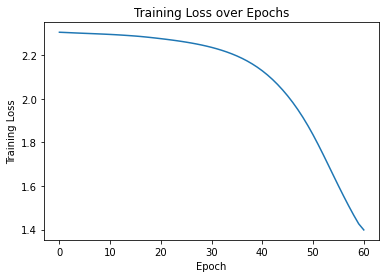

Test Accuracy: 48.73%


In [10]:
# Train the model
custom_dataloader = DataLoader(custom_dataset, batch_size=128, shuffle=True)
train_losses = train(model, custom_dataloader, criterion, optimizer, epochs=60)

# Evaluate on validation set (assuming you have a validation dataset)
# Replace 'validation_dataset' and 'validation_dataloader' with your actual validation dataset and dataloader.
validation_dataset = MNISTDataset(root='./dataset', train=False, transform=transform)
validation_dataloader = DataLoader(validation_dataset, batch_size=128, shuffle=False)
validation_accuracy = evaluate(model, validation_dataloader)

# Evaluate on test set
test_dataset = datasets.MNIST(root='./dataset', train=False, download=True, transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False)
test_accuracy = evaluate(model, test_dataloader)
test_loss=test_loss(model, test_dataloader, criterion, optimizer)


# Print accuracy on the test set
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


In [ ]:
from torch.utils.data import random_split

# Split test_dataset into validation and test sets
validation_size = int(0.4 * len(test_dataset))
test_size = len(test_dataset) - validation_size
validation_set, test_set = random_split(test_dataset, [validation_size, test_size])

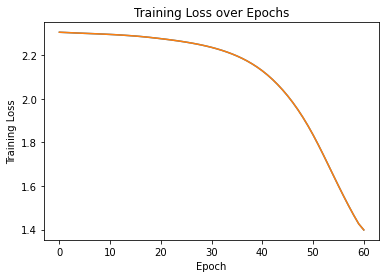

In [13]:
plt.plot(test_loss)
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()